In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

from env import get_db_url

import wrangle
import explore

In [2]:
# acquiring data
sql_query = '''
        SELECT *
        FROM customers ;
        '''
df = pd.read_sql(sql_query, get_db_url('mall_customers'))

In [3]:
# quick look
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# splitting the df
train, test = train_test_split(df, train_size=0.8, random_state=123)

In [5]:
train, validate = train_test_split(train, train_size=0.7, random_state=123)

In [16]:
# quick look at train split
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 123 to 22
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     112 non-null    int64 
 1   gender          112 non-null    object
 2   age             112 non-null    int64 
 3   annual_income   112 non-null    int64 
 4   spending_score  112 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.2+ KB


In [6]:
ss_corr = train.drop(columns=['customer_id']).corr()
ss_corr

,age,annual_income,spending_score
age,1.000000,0.020259,-0.337246
annual_income,0.020259,1.000000,0.037769
spending_score,-0.337246,0.037769,1.000000


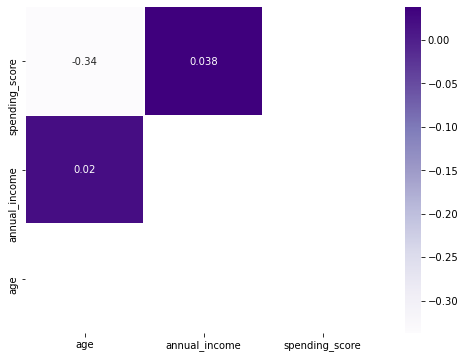

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(ss_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(ss_corr))
plt.ylim(0, 3)

plt.show()

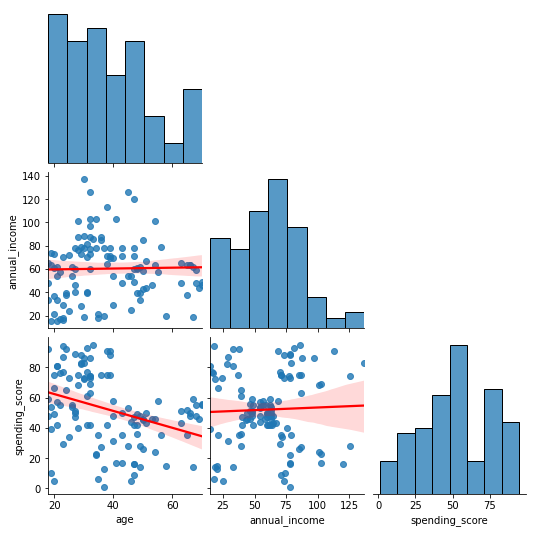

In [6]:
explore.plot_variable_pairs(train)

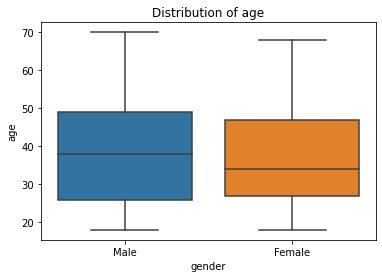

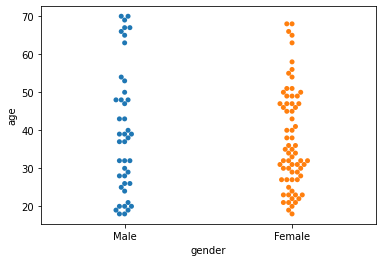

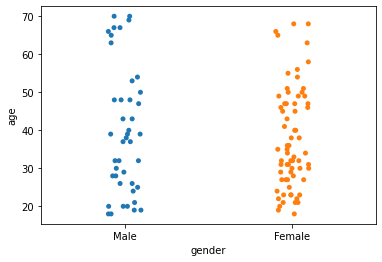

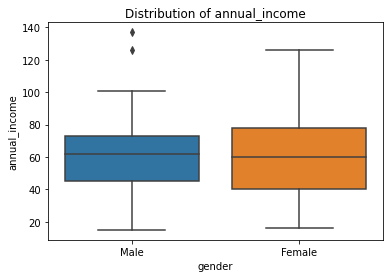

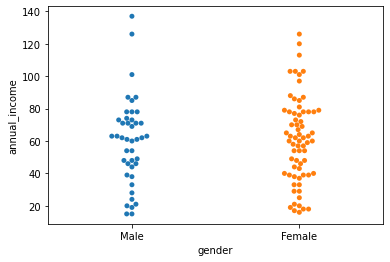

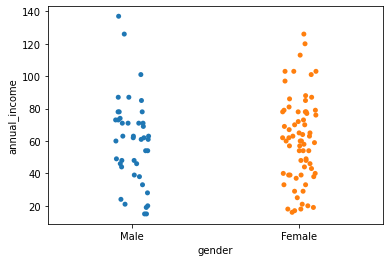

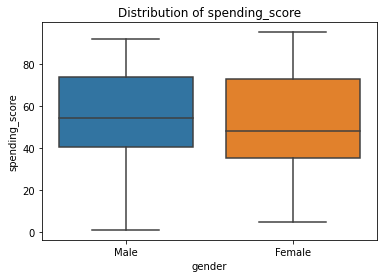

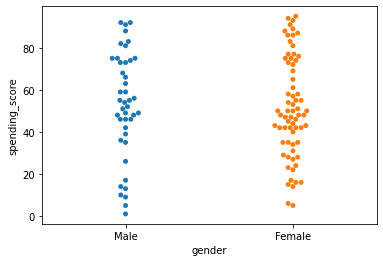

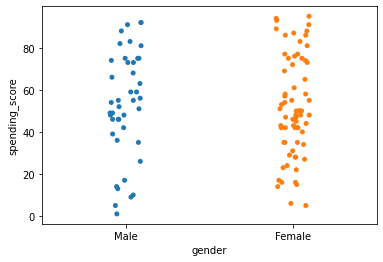

<Figure size 432x288 with 0 Axes>

In [7]:
cat_vars = ['gender']
cont_vars = ['age','annual_income', 'spending_score']

explore.plot_categorical_and_continuous_vars(train, cat_vars,cont_vars )

## Takeaways:

- There seems to be a linear relationship between age and spending score
- more women in upper age range than lower
- Median Spending score of men is higher than that of women